## 3. Tokenization using NLTK
---

### 3.1: Libraries and Dependencies
___

In [129]:
import re
import glob
import pickle
import tempfile
import numpy as np
import pandas as pd

from os import path
#from PIL import Image
from textblob import TextBlob
from string import punctuation
from collections import OrderedDict

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

np.random.seed(2020)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
#nltk.download('punkt')
#nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

### 3.2: Read and pass cleaned data through Pandas
___

In [2]:
# input_dir = r'../data/cleaned/' # use your path

# col_names = ['Date', 'User', 'Tweet', 'Url', 'Location', 'Hashtags']
# #all_files = glob.glob(input_dir + ".csv")
# all_files = glob.glob(input_dir + ".csv")
# #all_files = glob.glob(input_dir + "/*.csv")

# print (all_files)

# #li = []

# for filename in all_files:
#     df = pd.read_csv(filename)
#     li.append(df)

# #data = pd(li, axis=0, ignore_index=True)
# #print(data.shape)
# data.drop_duplicates(subset = "Url", inplace =True)
# #print(data.shape)
# data.head(2)

In [62]:
input_file = '../data/raw/tweets.csv'
output_file = '../data/cleaned/WitsTweets.csv'

In [5]:
 # Read in Raw Data and Assign Column Names where required
col_names = ['Date', 'User', 'Tweet', 'Url', "Location", 'Hashtags', 'Cleaned_Text', 'Stemmed']
data = pd.read_csv(output_file)
#data = pd.DataFrame(input_file, names = col_names) 
data.head() 

,Date,User,Tweet,Url,Location,Hashtags,cleaned_text,stemmed
0,2020-03-05 12:38:42,Deni707,The protests sparked last week by University o...,https://twitter.com/Deni707/status/12355452719...,NaN,NaN,protests sparked last week university kwazulu ...,"['protest', 'spark', 'last', 'week', 'univers'..."
1,2020-03-05 12:38:18,pearl_ndlalane,@Katlego_MS @Yessirmaa -Wits,https://twitter.com/pearl_ndlalane/status/1235...,"Rustenburg, South Africa",NaN,wits,['wit']
2,2020-03-05 12:37:37,mrlechesa,RT @NotInMyWatch: Students at Wits are going t...,https://twitter.com/mrlechesa/status/123554499...,Johannesburg,NaN,students wits going lot really heart breaking ...,"['student', 'wit', 'go', 'lot', 'realli', 'hea..."
3,2020-03-05 12:37:34,PhilarN_91,RT @Didi_Azania: ATT: Wits students! This is h...,https://twitter.com/PhilarN_91/status/12355449...,"Midrand, South Africa",NaN,att wits students got study overseas awareness,"['att', 'wit', 'student', 'got', 'studi', 'ove..."
4,2020-03-05 12:37:33,Maliwa_Luyanda,RT @Katlego_MS: Brand Ambassadors needed from...,https://twitter.com/Maliwa_Luyanda/status/1235...,PE | CPT,NaN,brand ambassadors needed following campuses uf...,"['brand', 'ambassador', 'need', 'follow', 'cam..."


In [5]:
data.drop_duplicates(subset=None, inplace=True)

### 3.3: Sentence Tokenization using nltk ([punkt sentence tokenizer](https://www.nltk.org/_modules/nltk/tokenize/punkt.html))

##### Each tweet document is a collection of sentence(s). Hence, we first need to apply a sentence tokenizer to each tweet document to be able to decompose and relate with each tweet document on file.

___

In [6]:
def CountSentenceTokens(input_text):
    num_sentences = len(sent_tokenize(input_text))
    return  num_sentences

In [7]:
data['Count_SentenceTokens'] = data.Tweet.apply(CountSentenceTokens)
data['Count_SentenceTokens']= data['Count_SentenceTokens'].astype('category')

Text(0,0.5,'Count')

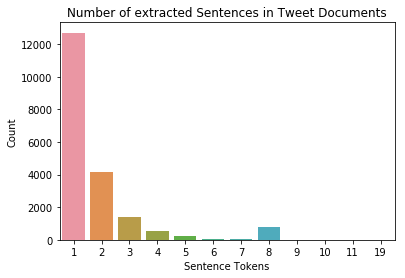

In [9]:
ax = sns.countplot(data['Count_SentenceTokens'])
ax.set_title('Number of extracted Sentences in Tweet Documents')
ax.set_xlabel('Sentence Tokens')
ax.set_ylabel('Count')

In [10]:
# this keeps structure of sentences extracted from tweets
# for sentences in data.Tweet.apply(sent_tokenize):
#     print('--------\n')
#     cnt = 0
#     for sentence in sentences:
#         cnt+=1
#         print(cnt, sentence, '\n')

In [11]:
data.shape

(19889, 9)

## Removing stopwords

##### To check the list of stopwords you can type the following commands in the python shell
___

In [12]:
# import io 
# from nltk.corpus import stopwords 
# from nltk.tokenize import word_tokenize 
# #word_tokenize accepts a string as an input, not a file. 

# def remove_stop_words(tweet):
#     stop_words = set(stopwords.words('english'))
#     word_tokens = word_tokenize(tweet) 

#     filtered_sentence = [w for w in word_tokens if not w in stop_words] 

#     filtered_sentence = [] 

#     for w in word_tokens: 
#         if w not in stop_words: 
#             filtered_sentence.append(w)
#     sentence = ' '.join(filtered_sentence)
#     return sentence

In [13]:
# data['cleaned_text'] = data.Tweet.apply(remove_stop_words)

In [14]:
# data.head()

### 3.4: Sentiment construction using TextBlob

___

In [15]:
def calc_polarity(tweet):
    text_obj = TextBlob(tweet)
    return text_obj.sentiment.polarity

def calc_subjectivity(tweet):
    text_obj = TextBlob(tweet)
    return text_obj.sentiment.subjectivity
     

In [16]:
# for i in data.cleaned_text:
#     print(i)
print( data['cleaned_text'].dtype)
data.cleaned_text.head()
print(TextBlob(data.cleaned_text[1]).sentiment.polarity)
data.cleaned_text.isna()
data.drop(data.loc[data.cleaned_text.isna()].index, inplace=True)

object
0.0


In [17]:
data['Polarity'] = data['cleaned_text'].apply(calc_polarity)
data['Subjectivity']= data['cleaned_text'].apply(calc_subjectivity)

### 3.4.1: Evaluating Average Polarity and Subjectivity

___

In [18]:
print(data.Polarity.mean(),data.Subjectivity.mean())

0.046928375950517014 0.2761361971701998


### 3.5: Define Function to Evaluate, Analyse \& Visualise Polarity Class

___

In [19]:
data.head(n=3)

,Date,User,Tweet,Url,Location,Hashtags,cleaned_text,stemmed,Count_SentenceTokens,Polarity,Subjectivity
0,2020-03-05 12:38:42,Deni707,The protests sparked last week by University o...,https://twitter.com/Deni707/status/12355452719...,NaN,NaN,protests sparked last week university kwazulu ...,"['protest', 'spark', 'last', 'week', 'univers'...",1,0.150,0.292593
1,2020-03-05 12:38:18,pearl_ndlalane,@Katlego_MS @Yessirmaa -Wits,https://twitter.com/pearl_ndlalane/status/1235...,"Rustenburg, South Africa",NaN,wits,['wit'],1,0.000,0.000000
2,2020-03-05 12:37:37,mrlechesa,RT @NotInMyWatch: Students at Wits are going t...,https://twitter.com/mrlechesa/status/123554499...,Johannesburg,NaN,students wits going lot really heart breaking ...,"['student', 'wit', 'go', 'lot', 'realli', 'hea...",1,-0.025,0.225000


In [20]:
#data[data.User == 'KanduAfrica']

In [21]:
def five_point_likert_scale(x):
    polarity_interpretation =''
    if x>=-1 and x<-0.6:
        polarity_interpretation = 'very negative'
    elif x>=-0.6 and x<-0.2:
        polarity_interpretation = 'negative'
    elif x>=-0.2 and x<0.2:
        polarity_interpretation='neutral'
    elif x>=0.2 and x<0.6:
        polarity_interpretation='positive'
    elif x>=0.6 and x<=1:
         polarity_interpretation='very positive'
    else:
        raise NotImplementedError
            
    return polarity_interpretation


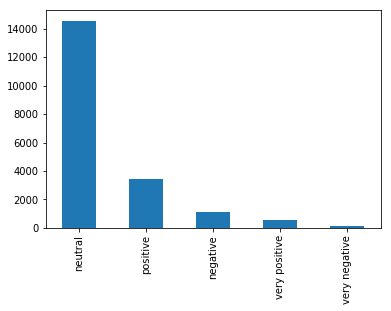

In [22]:
data['Polarity_Interpretation'] = data.Polarity.apply(five_point_likert_scale)
data['Polarity_Interpretation'].value_counts().plot(kind='bar') 

In [23]:
# data.timeStamp = pd.to_datetime(data.timeStamp)
from datetime import datetime, date, time, timezone

In [24]:
data['Date'] = pd.to_datetime(data['Date']).dt.date

Text(0.5,1,'Evaluation of comments by total sentiments based on Polarity')

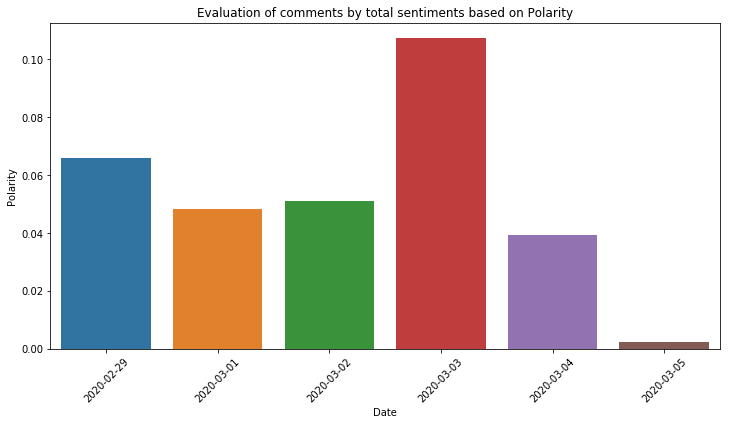

In [25]:
#data['Date'] = pd.to_datetime(data['Date']).datetime.date
#data['Date'] = pd.to_datetime(data['Date'])
#polarity_df = data[ ['Date', 'Polarity']].set_index( pd.DatetimeIndex(data['Date']), inplace = False,drop =True)

#polarity_df['Polarity Interpretation'] = polarity_df.Polarity.apply(five_point_likert_scale)
#polarity_df.index

data['Date']=pd.to_datetime(data['Date'].astype(str), format="%Y-%m-%d")

fig, ax =plt.subplots(figsize=(12,6))
sns.barplot(x = 'Date', y='Polarity',data=data, estimator=np.mean, ci=None, ax = ax)
x_dates = pd.to_datetime(data['Date']).dt.strftime("%Y-%m-%d").sort_values().unique()
ax.set_xticklabels(labels=x_dates , rotation='45')
ax.set_title('Evaluation of comments by total sentiments based on Polarity')

In [26]:
#data[['Date', 'Polarity']].groupby('Date')['Polarity'].mean().apply(five_point_likert_scale)
data[['Date', 'Polarity']].groupby('Date')['Polarity'].mean()

Date
2020-02-29    0.066044
2020-03-01    0.048444
2020-03-02    0.050957
2020-03-03    0.107266
2020-03-04    0.039202
2020-03-05    0.002326
Name: Polarity, dtype: float64

### 3.6: Generate WordCloud from Tweets 
##### The larger the words appeared on a tweet, the more frequently they appeared on Twitter. An informative image that communicates highly popular or trending terms based on frequency of use and prominence

___

In [27]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
data.head()

,Date,User,Tweet,Url,Location,Hashtags,cleaned_text,stemmed,Count_SentenceTokens,Polarity,Subjectivity,Polarity_Interpretation
0,2020-03-05,Deni707,The protests sparked last week by University o...,https://twitter.com/Deni707/status/12355452719...,NaN,NaN,protests sparked last week university kwazulu ...,"['protest', 'spark', 'last', 'week', 'univers'...",1,0.150,0.292593,neutral
1,2020-03-05,pearl_ndlalane,@Katlego_MS @Yessirmaa -Wits,https://twitter.com/pearl_ndlalane/status/1235...,"Rustenburg, South Africa",NaN,wits,['wit'],1,0.000,0.000000,neutral
2,2020-03-05,mrlechesa,RT @NotInMyWatch: Students at Wits are going t...,https://twitter.com/mrlechesa/status/123554499...,Johannesburg,NaN,students wits going lot really heart breaking ...,"['student', 'wit', 'go', 'lot', 'realli', 'hea...",1,-0.025,0.225000,neutral
3,2020-03-05,PhilarN_91,RT @Didi_Azania: ATT: Wits students! This is h...,https://twitter.com/PhilarN_91/status/12355449...,"Midrand, South Africa",NaN,att wits students got study overseas awareness,"['att', 'wit', 'student', 'got', 'studi', 'ove...",3,0.000,0.000000,neutral
4,2020-03-05,Maliwa_Luyanda,RT @Katlego_MS: Brand Ambassadors needed from...,https://twitter.com/Maliwa_Luyanda/status/1235...,PE | CPT,NaN,brand ambassadors needed following campuses uf...,"['brand', 'ambassador', 'need', 'follow', 'cam...",8,0.000,0.100000,neutral


### 3.6.1: Save pandas.DataFrame.to_csv

___

In [29]:
data.to_csv('BWTProj.csv', encoding='utf-8', index=False)

### 3.6.2: Generate each Polarity Class within the Polarity_Interpretation Column of the Frame

___

In [30]:
 criteria = (data['Polarity_Interpretation']=='positive')
 positive_data = data[criteria]

 criteria = (data['Polarity_Interpretation']=='negative')
 negative_data = data[criteria]

 criteria = (data['Polarity_Interpretation']=='neutral')
 neutral_data = data[criteria]

 #positive_data.head()

In [31]:
def create_word_cloud(tweet_dataframe,number_words, title):
    s= ' '
    joined_tweet = s.join(tweet_dataframe.cleaned_text)
    text = joined_tweet

    # create coloring from image  
    #image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=(15,10))
    wordcloud = WordCloud(max_words=number_words, background_color='white', mode="RGB", width=2000, height=1000).generate(text)

     # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=36)
    plt.axis("off")

    # store to file
    #plt.savefig("img/spa_wine.png", format="png")
    plt.show()
    print("********************************")

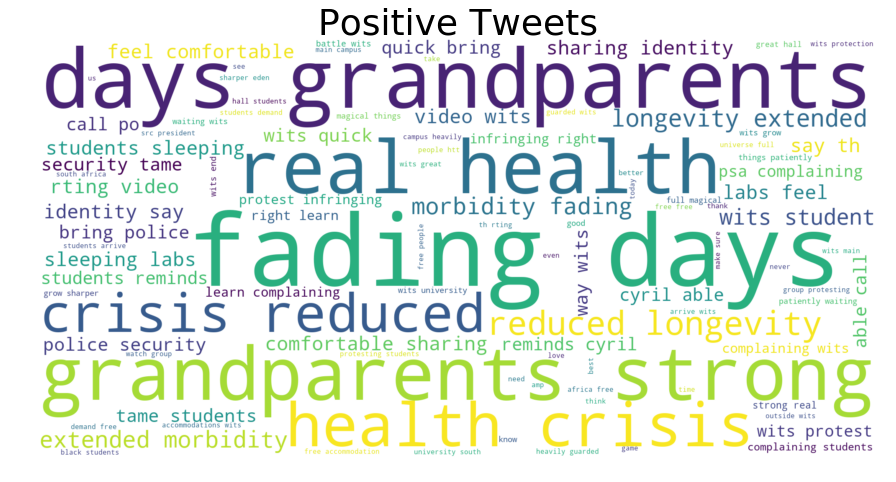

********************************


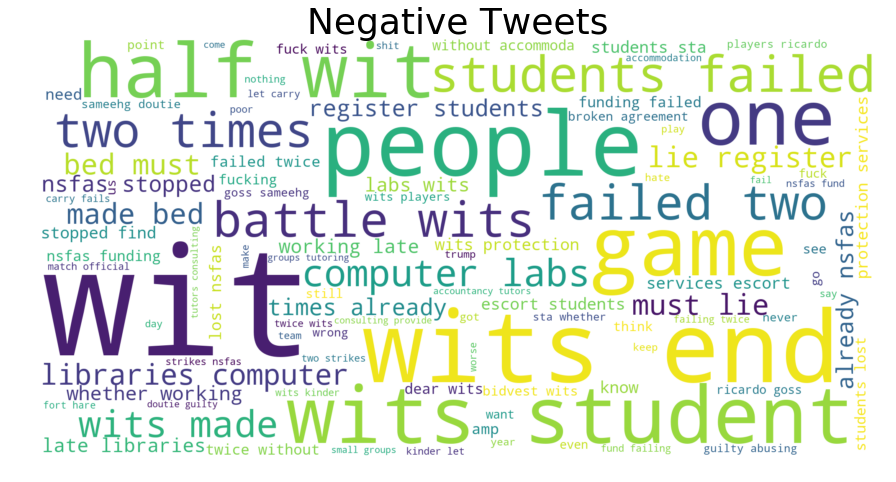

********************************


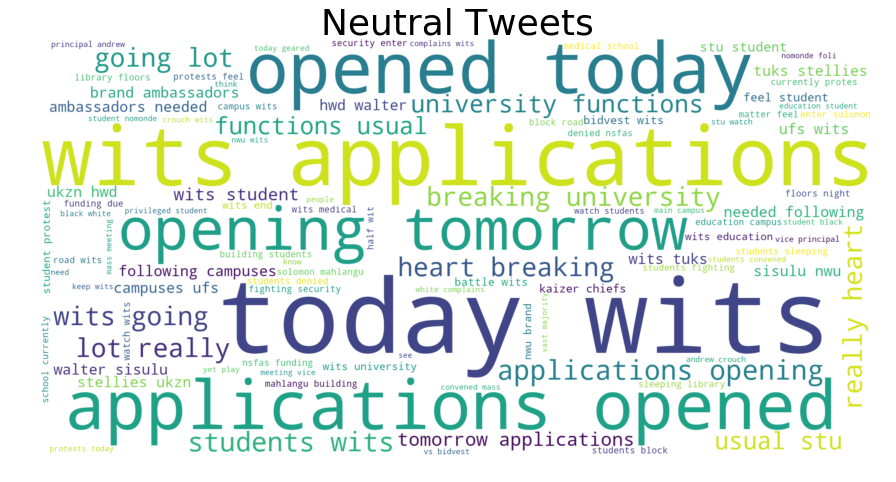

********************************


In [32]:
#create_word_cloud such that it iterates through the polarity classes(positive_data,30)
list_of_dt =[(positive_data, 'Positive Tweets'),(negative_data,'Negative Tweets'),(neutral_data, 'Neutral Tweets' )]
for i in list_of_dt:
    data =i[0]
    title = i[1]
    create_word_cloud(data,100, title)

<!-- ### 3.6: Topic Modeling -->

<!-- #### 3.6.1: Tokenize Tweet

___ -->

### 3.7: Topic Modeling with Gensim
___

#### by Selva Prabhakaran
Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package. The challenge, however, is how to extract good quality of topics that are clear, segregated and meaningful. This depends heavily on the quality of text preprocessing and the strategy of finding the optimal number of topics. This task attempts to tackle both of these problems.
___

Knowing what people are talking about and understanding their problems and opinions is highly valuable to businesses, administrators, political campaigns. And it’s really hard to manually read through such large volumes and compile the topics. Thus it requires an automated algorithm that can read through the text documents and automatically output the topics discussed.
___

In this task, we will take a tweet document about WITS University and use LDA to extract the naturally discussed topics using the Latent Dirichlet Allocation (LDA) from Gensim package.

___

### 3.7.1: Essentially, What does LDA do?
___
LDA’s approach to topic modeling is it considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Mathematically speaking : Document = Tweet = Collection of Topics in a proportion within a Tweet = Collection of Keywords in a certain proportion 

___

Once you provide the algorithm with the number of topics, all it does is to rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.
___

When I say topic, what is it actually and how it is represented? A topic is nothing but a collection of dominant keywords that are typical representatives. Just by looking at the keywords, you can identify what the topic is all about.

### 3.8: The following are key factors to obtaining good segregation topics:
___

- The quality of text processing.
- The variety of topics the text talks about.
- The choice of topic modeling algorithm.
- The number of topics fed to the algorithm.
- The algorithms tuning parameters.

### 3.8.1: Prepare Stopwords

### Install Libraries

In [113]:
from pprint import pprint
import gensim
import pyLDAvis.gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models, similarities
from gensim.parsing.preprocessing import STOPWORDS
import matplotlib.pyplot as plt
import spacy
from gensim.models import CoherenceModel

### 3.8.2: Tokenize words in a Single Tweet
___

In [114]:
#data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(row['Tweet']), axis=1)
data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(row['cleaned_text']), axis=1)
tokenized_tweets = data['tokenized_sents'].tolist()
tokenized_tweets[0]

['protests',
 'sparked',
 'last',
 'week',
 'university',
 'kwazulu',
 'natal',
 'later',
 'spread',
 'across',
 'country',
 'wits',
 'western',
 'cape',
 'walter',
 'sisulu',
 'university',
 'fort',
 'hare',
 'next',
 'must',
 'surely',
 'rhodes',
 'stellenbosch',
 'pretoria',
 'free',
 'state',
 'limpopo',
 'johannesburg']

### 3.8.3: Create Dictionary

___

In [106]:
id2word = corpora.Dictionary(tokenized_tweets)

In [107]:
# Create Corpus
texts = tokenized_tweets

In [108]:
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [109]:
# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 1)]]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

For example, (0, 1) above implies, word id 0 occurs once in the first document. Likewise, word id 1 occurs twice and so on.

This is used as the input by the LDA model.

If you want to see what word a given id corresponds to, pass the id as a key to the dictionary.

In [110]:
id2word[0]

'across'

##### Or, you can see a human-readable form of the corpus itself.
___

In [111]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('across', 1),
  ('cape', 1),
  ('country', 1),
  ('fort', 1),
  ('free', 1),
  ('hare', 1),
  ('johannesburg', 1),
  ('kwazulu', 1),
  ('last', 1),
  ('later', 1),
  ('limpopo', 1),
  ('must', 1),
  ('natal', 1),
  ('next', 1),
  ('pretoria', 1),
  ('protests', 1),
  ('rhodes', 1),
  ('sisulu', 1),
  ('sparked', 1),
  ('spread', 1),
  ('state', 1),
  ('stellenbosch', 1),
  ('surely', 1),
  ('university', 2),
  ('walter', 1),
  ('week', 1),
  ('western', 1),
  ('wits', 1)]]

### 3.8.4: Building the Topic Model

___

In [100]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

chunksize is the number of documents to be used in each training chunk. 
update_every determines how often the model parameters should be updated and passes is the total number of training passes.

___

The above LDA model is built with 4 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.
___

### 3.8.5: View the topics in LDA model
___

The above LDA model is built with 20 different topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

You can see the keywords for each topic and the weightage(importance) of each keyword using lda_model.print_topics() as shown next.

In [101]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.183*"got" + 0.171*"due" + 0.059*"looking" + 0.030*"fighting" + '
  '0.020*"instead" + 0.020*"studying" + 0.009*"currently" + 0.009*"security" + '
  '0.007*"company" + 0.005*"p"'),
 (1,
  '0.387*"wits" + 0.119*"applications" + 0.119*"2021" + 0.086*"today" + '
  '0.060*"tomorrow" + 0.060*"opened" + 0.059*"opening" + 0.035*"battle" + '
  '0.016*"half" + 0.009*"see"'),
 (2,
  '0.000*"jazz" + 0.000*"fondest" + 0.000*"toddmatshikiza" + 0.000*"murderer" '
  '+ 0.000*"kong" + 0.000*"nopety" + 0.000*"boxer" + 0.000*"dorkay" + '
  '0.000*"pr" + 0.000*"ezekiel"'),
 (3,
  '0.232*"drag" + 0.207*"time" + 0.059*"must" + 0.053*"u" + 0.050*"next" + '
  '0.042*"always" + 0.041*"well" + 0.027*"country" + 0.020*"bro" + '
  '0.018*"pay"'),
 (4,
  '0.404*"one" + 0.078*"years" + 0.053*"happened" + 0.041*"seen" + '
  '0.000*"like" + 0.000*"fight" + 0.000*"combat" + 0.000*"2" + 0.000*"flying" '
  '+ 0.000*"bring"'),
 (5,
  '0.292*"keep" + 0.083*"could" + 0.026*"different" + 0.000*"earned" + '
  '0.00

#### How to interpret this?
____

Topic 1 is a represented as _0.386“wits” + 0.119“application” + 0.119“2021” + 0.086“today” + 0.060“tomorrow” + 0.060“opened” + 0.059“opening” + 0.035“battle” + 0.016“half” + ‘0.009“see”.

It means the top 10 keywords that contribute to this topic are: ‘wits’, ‘application’, ‘2021’.. and so on and the weight of ‘wits’ on topic 1 is 0.386.

The weights reflect how important a keyword is to that topic.

Looking at these keywords, can you guess what this topic could be? You may summarise it either are ‘wits’ or ‘university’.

Likewise, can you go through the remaining topic keywords and judge what the topic is?
___

### 3.8.6: Compute Model Perplexity and Coherence Score
___
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. In my experience, topic coherence score, in particular, has been more helpful.
___

In [127]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.


Perplexity:  -17.094676273474096


In [128]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_tweets, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3225116720589355


### 3.8.7: Visualize the topic-keywords
___

Now that the LDA model is built, the next step is to examine the produced topics and the associated keywords. There is no better tool than pyLDAvis package’s interactive chart and is designed to work well with jupyter notebooks.

In [130]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus= corpus,dictionary=dictionary) 
vis

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.562969 -0.075694       1        1  49.421017
17    -0.050029 -0.059396       2        1  13.768051
9      0.066387 -0.016950       3        1   6.475962
19    -0.041403 -0.003211       4        1   5.466564
3     -0.091126  0.378611       5        1   4.141759
0      0.037750 -0.021872       6        1   3.948240
14    -0.012173 -0.007147       7        1   3.229211
13     0.015174 -0.017153       8        1   3.044038
11     0.047950 -0.020578       9        1   2.925886
18     0.017757 -0.017486      10        1   2.080849
10    -0.001412 -0.011893      11        1   1.841134
4      0.027863 -0.019307      12        1   1.351619
5      0.056476 -0.019781      13        1   0.709669
16     0.068224 -0.015618      14        1   0.476092
6      0.069949 -0.013371      15        1   0.373716
8      0.069388 -0.014322      16        1   0.322644
7      0.070316 -0.012464      17        1   0.219943
15     0.070626 -0.010788      18        1   0.068162
12     0.070626 -0.010788      19        1   0.067764
2      0.070626 -0.010788      20        1   0.067684, topic_info=     Category         Freq          Term         Total  loglift  logprob
27    Default  31196.00000          wits  31196.000000  30.0000  30.0000
252   Default   4591.00000           amp   4591.000000  29.0000  29.0000
30    Default   3597.00000         going   3597.000000  28.0000  28.0000
580   Default   9350.00000  applications   9350.000000  27.0000  27.0000
578   Default   9323.00000          2021   9323.000000  26.0000  26.0000
...       ...          ...           ...           ...      ...      ...
4704  Topic20      0.00857          kule      2.924234   1.4656  -9.4374
4191  Topic20      0.00857            hr      2.924234   1.4656  -9.4374
4212  Topic20      0.00857       silence      2.924280   1.4655  -9.4374
4211  Topic20      0.00857       tsamaya      2.924233   1.4656  -9.4374
4210  Topic20      0.00857        legacy      2.924233   1.4656  -9.4374

[2047 rows x 6 columns], token_table=       Topic      Freq                                Term
term                                                      
1012       2  0.341828                                   0
1012       3  0.341828                                   0
5280       2  0.341970                                 044
5280       3  0.341970                                 044
401        2  0.341774                                   1
...      ...       ...                                 ...
5191       3  0.341970                                yhuu
12181      2  0.341948                                yoon
12181      3  0.341948                                yoon
11984      2  0.341966  yourstatementiswhatcreatesfakenews
11984      3  0.341966  yourstatementiswhatcreatesfakenews

[2061 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 18, 10, 20, 4, 1, 15, 14, 12, 19, 11, 5, 6, 17, 7, 9, 8, 16, 13, 3])

### So how to infer pyLDAvis’s output?

Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic.

A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

Alright, if you move the cursor over one of the bubbles, the words and bars on the right-hand side will update. These words are the salient keywords that form the selected topic.

We have successfully built a good looking topic model.



## Future Work

___

Upnext, we will improve upon this model by using Mallet’s version of LDA algorithm and then we will focus on how to arrive at the optimal number of topics given any large corpus of text.